## Foundations of Data Science: Computational Thinking with Python

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 11: Joins

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
pd.set_option('max_rows', 9)

In [2]:
drinks = pd.DataFrame([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]],
    columns=['Drink', 'Cafe', 'Price'])
display(drinks)

discounts = pd.DataFrame({
    'Coupon % off': [25, 50, 5],
    'Location': ['Tea One', 'Nefeli', 'Tea One']})
discounts


,Drink,Cafe,Price
0,Milk Tea,Tea One,4
1,Espresso,Nefeli,2
2,Latte,Nefeli,3
3,Espresso,Abe's,2


,Coupon % off,Location
0,25,Tea One
1,50,Nefeli
2,5,Tea One


In [3]:
tea = drinks.set_index('Cafe').join(discounts.set_index('Location'), how='inner')
tea

,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


In [4]:
tea['Discounted'] = tea.Price * (1 - (tea['Coupon % off'] / 100))
tea

,Drink,Price,Coupon % off,Discounted
Nefeli,Espresso,2,50,1.0
Nefeli,Latte,3,50,1.5
Tea One,Milk Tea,4,25,3.0
Tea One,Milk Tea,4,5,3.8


In [5]:
# Self join
#  All combinations of two drinks
two = drinks.set_index('Cafe').join(drinks.set_index('Cafe'), 
                                    lsuffix='_1', rsuffix='_2')
two

,Drink_1,Price_1,Drink_2,Price_2
Cafe,,,,
Abe's,Espresso,2,Espresso,2
Nefeli,Espresso,2,Espresso,2
Nefeli,Espresso,2,Latte,3
Nefeli,Latte,3,Espresso,2
Nefeli,Latte,3,Latte,3
Tea One,Milk Tea,4,Milk Tea,4


### Bikes example

In [6]:
trips = pd.read_csv('data/trip.csv')
trips

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
...,...,...,...,...,...,...,...,...,...,...,...
354148,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
354149,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
354150,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32
354151,432947,569,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,318,Customer,32


In [7]:
trips.Duration.describe()

count    3.541520e+05
mean     1.046033e+03
std      3.001694e+04
min      6.000000e+01
25%      3.420000e+02
50%      5.110000e+02
75%      7.390000e+02
max      1.727040e+07
Name: Duration, dtype: float64

In [8]:
trips.columns

Index(['Trip ID', 'Duration', 'Start Date', 'Start Station', 'Start Terminal',
       'End Date', 'End Station', 'End Terminal', 'Bike #', 'Subscriber Type',
       'Zip Code'],
      dtype='object')

<class 'matplotlib.axes._subplots.AxesSubplot'>


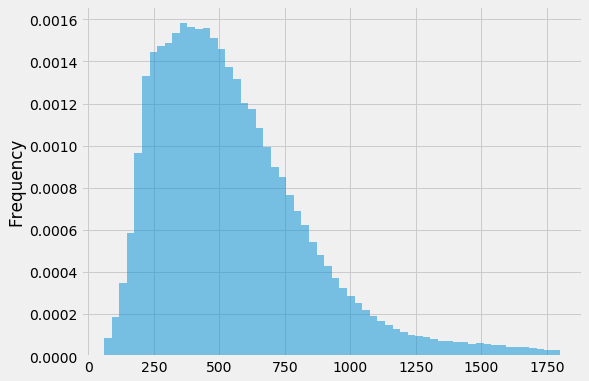

In [9]:
# commute = table of trips under 30min
commute = trips.loc[trips.Duration < 1800]

fig = plt.figure()
ax = commute.Duration.plot.hist(density=True, bins=60, alpha=0.5)
print(type(ax))
fig.set_size_inches(8, 6)
plt.show()


In [10]:
starts = commute.loc[:, 'Start Station'].value_counts().to_frame()
starts

,Start Station
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
...,...
Redwood City Medical Center,139
San Mateo County Center,108
Redwood City Public Library,101
Franklin at Maple,62


In [11]:
commute.pivot_table('Trip ID', 'End Station', 'Start Station', aggfunc=len, 
                    fill_value=0, dropna=False)

Start Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,...,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
End Station,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,...,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,...,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,...,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,...,116,102,0,0,182,750,200,0,43,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Townsend at 7th,347,309,418,313,0,0,55,43,0,0,...,344,464,0,0,734,825,132,0,53,261
University and Emerson,0,0,0,0,0,0,0,0,82,0,...,0,0,0,0,0,0,0,62,0,0
Washington at Kearny,142,142,72,47,0,0,57,25,0,0,...,62,24,0,0,107,90,29,0,55,66
Yerba Buena Center of the Arts (3rd @ Howard),83,180,174,90,0,0,65,34,0,0,...,75,141,0,0,214,403,153,0,36,73


In [12]:
commute.pivot_table('Duration', 'End Station', 'Start Station', aggfunc=np.min) 

Start Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,...,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
End Station,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,61.0,97.0,164.0,268.0,NaN,NaN,271.0,407.0,NaN,NaN,...,590.0,208.0,NaN,NaN,318.0,149.0,448.0,NaN,429.0,165.0
2nd at South Park,61.0,60.0,77.0,86.0,NaN,NaN,78.0,345.0,NaN,NaN,...,399.0,63.0,NaN,NaN,79.0,61.0,78.0,NaN,270.0,96.0
2nd at Townsend,137.0,67.0,60.0,423.0,NaN,NaN,311.0,469.0,NaN,NaN,...,777.0,241.0,NaN,NaN,291.0,249.0,259.0,NaN,610.0,284.0
5th at Howard,215.0,300.0,384.0,68.0,NaN,NaN,357.0,530.0,NaN,NaN,...,375.0,402.0,NaN,NaN,455.0,265.0,357.0,NaN,553.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Townsend at 7th,399.0,324.0,319.0,330.0,NaN,NaN,614.0,822.0,NaN,NaN,...,351.0,514.0,NaN,NaN,624.0,534.0,61.0,NaN,817.0,432.0
University and Emerson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN
Washington at Kearny,266.0,378.0,464.0,269.0,NaN,NaN,142.0,69.0,NaN,NaN,...,514.0,341.0,NaN,NaN,165.0,248.0,642.0,NaN,65.0,190.0
Yerba Buena Center of the Arts (3rd @ Howard),145.0,212.0,299.0,128.0,NaN,NaN,262.0,420.0,NaN,NaN,...,464.0,287.0,NaN,NaN,320.0,190.0,479.0,NaN,360.0,60.0


In [13]:
commute.groupby(['Start Station', 'End Station']).Duration.min().to_frame()

Duration
Start Station                                 End Station                                            
2nd at Folsom                                 2nd at Folsom                                        61
                                              2nd at South Park                                    61
                                              2nd at Townsend                                     137
                                              5th at Howard                                       215
...                                                                                               ...
Yerba Buena Center of the Arts (3rd @ Howard) Temporary Transbay Terminal (Howard at Beale)       226
                                              Townsend at 7th                                     432
                                              Washington at Kearny                                190
                                              Yerba Buena Center of the Arts (3rd @ Howard)        60

[1629 rows x 1 columns]

In [14]:
(commute
 .loc[commute['Start Station'].str.contains('Civic Center BART')]
 .groupby(['Start Station', 'End Station']).Duration.min()
 .sort_values()
 .to_frame()
)

Duration
Start Station                     End Station                                
Civic Center BART (7th at Market) Civic Center BART (7th at Market)        60
                                  Powell Street BART                       97
                                  Market at 10th                          104
                                  Golden Gate at Polk                     141
...                                                                       ...
                                  Spear at Folsom                         611
                                  Embarcadero at Bryant                   676
                                  Embarcadero at Sansome                  703
                                  Embarcadero at Vallejo                  831

[35 rows x 1 columns]

### Maps

In [15]:
stations = pd.read_csv('data/station.csv')
stations

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
...,...,...,...,...,...,...,...
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014
69,84,Ryland Park,37.342725,-121.895617,15,San Jose,4/9/2014


In [34]:
import folium
# Documentation
# http://leafletjs.com/reference-1.2.0.html#path
# also help(folium....) works well (ie. help(folium.CircleMarker))

# Station map centered at average longinature and latitude
station_map = folium.Map(location=[stations.lat.mean(), 
                                   stations.long.mean()])

# Add station markers
stations.apply(lambda row: folium.Marker([row.lat, row.long], 
                                         popup=row['name'])
                           .add_to(station_map), axis='columns')

station_map

In [72]:
# Station map centered at average longinature and latitude

sf_stations = stations.loc[stations.landmark=='San Francisco']

station_map = folium.Map(location=[sf_stations.lat.mean(), 
                                   sf_stations.long.mean()],
                         zoom_start=14,
                        )

# Add station markers
(sf_stations
 .apply(lambda row: folium.CircleMarker([row.lat, row.long], 
                                        popup=row['name'],
                                        radius=10,
                                        stroke=False,
                                        fill=True,
                                        fill_color='green',
                                        fill_opacity=0.7,
                                        color='green',
                                       )
                    .add_to(station_map),
        axis='columns')
)

station_map


In [84]:
colors = pd.DataFrame({'color': ['blue', 'red', 'green', 'orange', 'purple']},
                        index=[stations.landmark.unique()])
colors

,color
San Jose,blue
Redwood City,red
Mountain View,green
Palo Alto,orange
San Francisco,purple


In [90]:
stations.join(colors, on='landmark', how='outer')

,station_id,name,lat,long,dockcount,landmark,installation,color
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,blue
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,blue
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,blue
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,blue
...,...,...,...,...,...,...,...,...
63,75,Mechanics Plaza (Market at Battery),37.791300,-122.399051,19,San Francisco,8/25/2013,purple
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,8/25/2013,purple
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013,purple
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014,purple


In [95]:
station_map = folium.Map(location=[stations.lat.mean(), 
                                   stations.long.mean()],
                         zoom_start=10,
                        )

# Add station markers
(stations.join(colors, on='landmark', how='outer')
 .apply(lambda row: folium.CircleMarker([row.lat, row.long], 
                                        popup=row['name'],
                                        radius=10,
                                        stroke=False,
                                        fill=True,
                                        fill_color=row['color'],
                                        fill_opacity=0.7,
                                        color=row['color'],
                                       )
                    .add_to(station_map),
        axis='columns')
)

station_map